In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

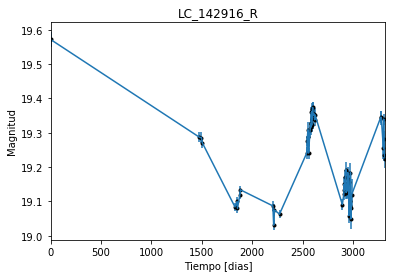

In [2]:
data = np.genfromtxt('LC_142916_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_142916_R')
plt.savefig("LC_142916_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

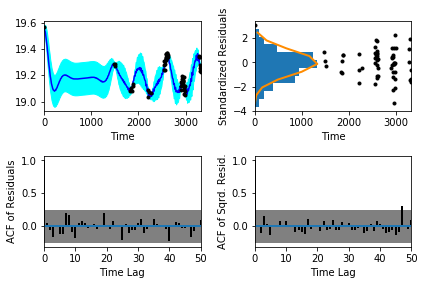

In [5]:
sample.assess_fit()

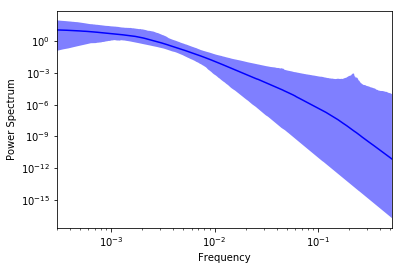

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

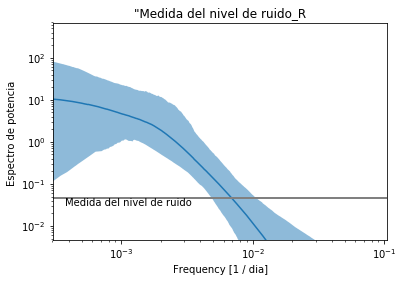

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_142916_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_142916_R')

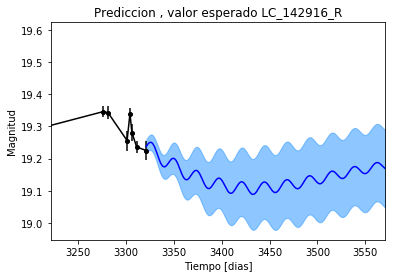

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_142916_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_142916_R')

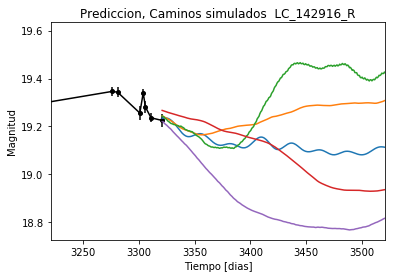

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_142916_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


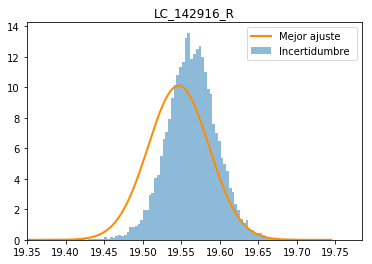

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_142916_R')
plt.savefig("Mejor_ajuste_LC_142916_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_142916_R')

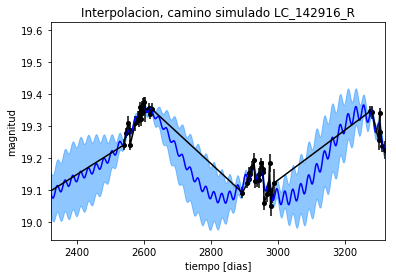

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_142916_R')

Text(0.5,1,'Interpolacion, camino simulado LC_142916_R')

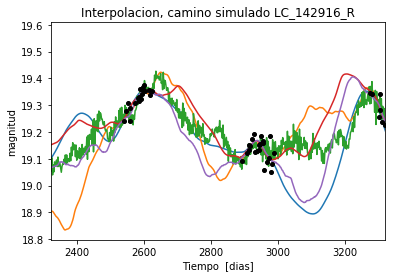

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_142916_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 401.887621822
Median: 0.00688138701474
Standard deviation: 0.187710005068
68% credibility interval: [ 0.00080622  0.15101849]
95% credibility interval: [  3.36608362e-04   7.51231380e-01]
99% credibility interval: [  3.12338071e-04   9.66714226e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 639.566685317
Median: 0.00243602513484
Standard deviation: 0.0896768145079
68% credibility interval: [ 0.00054112  0.02576314]
95% credibility interval: [ 0.0003289   0.27653967]
99% credibility interval: [  3.06704516e-04   7.09190087e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 272.908343766
Median: 0.00893330811106
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 757.033694834
Median: 131.885923823
Standard deviation: 1.70273827672
68% credibility interval: [ 130.08001059  133.01076507]
95% credibility interval: [ 127.54239011  134.84074676]
99% credibility interval: [ 125.25921648  135.68535751]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 510.086965055
Median: 0.449153811947
Standard deviation: 2.17693616875
68% credibility interval: [ 0.04402391  3.88243723]
95% credibility interval: [ 0.01389924  7.21908046]
99% credibility interval: [  0.01026914  10.0820601 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 502.353253407
Median: 0.418695369789
Standard deviation: 8.71231763466
68% credibility interval: [ 0.01332712  8.30749287]
95% credibility interval: [  1.08635474e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 17637.6116737
Median: 3.55659168647e-20
Standard deviation: 1.73753138824e+86
68% credibility interval: [  1.25110690e-66   5.13512905e+00]
95% credibility interval: [  2.96590361e-165   3.19281990e+055]
99% credibility interval: [  1.68397448e-174   6.51908549e+080]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1084.0130589
Median: 19.2378373253
Standard deviation: 0.0970468107218
68% credibility interval: [ 19.16543422  19.33215632]
95% credibility interval: [ 19.08822553  19.46309681]
99% credibility interval: [ 18.9855292   19.57760611]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 334.535335074
Median: 0.0111545337619
Standard deviation: 0.242293034584
68% credibility interval: [ 0.          0.34537786]
95% credibility interval: [ 0.          0.87050728]
99% credibility interval: [ 0.          1.00658681]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 334.535335074
Median: 0.0111545337619
Standard deviation: 0.242293034584
68% credibility interval: [ 0.          0.34537786]
95% credibility interval: [ 0.          0.87050728]
99% credibility interval: [ 0.          1.00658681]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 438.05870349
Median: 0.0
Standard deviation: 0.000785799917949
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 757.033694834
Median: 131.885923823
Standard deviation: 1.70273827672
68% credibility interval: [ 130.08001059  133.01076507]
95% credibility interval: [ 127.54239011  134.84074676]
99% credibility interval: [ 125.25921648  135.68535751]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1506.82223667
Median: 0.0320520152581
Standard deviation: 0.0412311923529
68% credibility interval: [ 0.01907229  0.06068061]
95% credibility interval: [ 0.01202295  0.14548222]
99% credibility interval: [ 0.00838531  0.26189557]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 845.286954482
Median: 1.41006183022
Standard deviation: 0.23464398415
68% credibility interval: [ 1.1906776   1.64640732]
95% credibility interval: [ 0.93236632  1.87829388]
99% credibility interval: [ 0.72928868  1.9594593 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 933.788607489
Median: 0.000146408353168
Standard deviation: 0.0741227431978
68% credibility interval: [  5.83927849e-07   6.75718720e-03]
95% credibility interval: [  3.42649802e-59   1.46736550e-01]
99% credibility interval: [  4.92362617e-85   5.14853980e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 401.887621822
Median: (-0.0432370297841-0.0336872375487j)
Standard deviation: 1.9257830805
68% credibility interval: [-0.94887716+0.j         -0.00506566-0.07902934j]
95% credibility interval: [ -4.72012597e+00+0.j          -2.11497272e-03-0.28465219j]
99% credibility interval: [ -6.07404462e+00+0.j          -1.96247798e-03-0.53708329j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 639.566685317
Median: (-0.0153059973352+0j)
Standard deviation: 1.62329890208
68% credibility interval: [-0.16187458+1.34363194j -0.00339998+0.j        ]
95% credibility interval: [-1.73755001+0.00792386j -0.00206653+0.01316235j]
99% credibility interval: [ -4.45597274e+00+0.7400258j  -1.92708131e-03+0.j       ]
Posterior summary for param